In [1]:
%env keras_backend = tensorflow

env: keras_backend=tensorflow


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#import dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [4]:
#reshape
#x_train.shape
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [5]:
x_train[9487].shape

(28, 28, 1)

In [6]:
x_train[9487][:,:,0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240,
        253, 165,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 241,
        252, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [7]:
#1-hot
from keras.utils import np_utils

y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

In [8]:
y_test[5].shape

(10,)

In [9]:
#CNN start

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

In [10]:
#new model
model = Sequential()

In [11]:
#first hidden layer
#32 filters, filter is 3x3
#output format is still the same 28x28(padding)
#output will be 32 28x28metrics
model.add(Conv2D(32,(3,3), padding='same', input_shape=(28,28,1)))
model.add(Activation('relu'))

In [12]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [13]:
#64 filters
model.add(Conv2D(64,(3,3), padding='same'))
model.add(Activation('relu'))

In [14]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [15]:
#128 filters
model.add(Conv2D(128,(3,3), padding='same'))
model.add(Activation('relu'))

In [16]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [17]:
#送到Dense層之前要拉成向量
model.add(Flatten())
model.add(Dense(200))
model.add(Activation('relu'))

In [18]:
#output
model.add(Dense(10))
model.add(Activation('softmax'))
#finish building model

In [19]:
#compile
model.compile(loss='mse', optimizer=SGD(lr=0.05), metrics=['accuracy'])

In [20]:
#check model
#(3*3+1)*32
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
__________

In [30]:
#train model epochs was 12, first run
model.fit(x_train, y_train, batch_size=100, epochs=12)

Epoch 1/12
60000/60000 [==============================] - 145s 2ms/step - loss: 0.1805 - acc: 0.0975
Epoch 2/12
60000/60000 [==============================] - 138s 2ms/step - loss: 0.1805 - acc: 0.0975
Epoch 3/12
60000/60000 [==============================] - 151s 3ms/step - loss: 0.1805 - acc: 0.0975
Epoch 4/12
60000/60000 [==============================] - 162s 3ms/step - loss: 0.1805 - acc: 0.0975
Epoch 5/12
60000/60000 [==============================] - 156s 3ms/step - loss: 0.1805 - acc: 0.0975
Epoch 6/12
60000/60000 [==============================] - 186s 3ms/step - loss: 0.1805 - acc: 0.0975
Epoch 7/12
60000/60000 [==============================] - 181s 3ms/step - loss: 0.1805 - acc: 0.0975
Epoch 8/12
60000/60000 [==============================] - 147s 2ms/step - loss: 0.1805 - acc: 0.0975
Epoch 9/12
60000/60000 [==============================] - 160s 3ms/step - loss: 0.1805 - acc: 0.0975
Epoch 10/12
60000/60000 [==============================] - 157s 3ms/step - loss: 0.1805 - a

In [31]:
#second run
model.fit(x_train, y_train, batch_size=100, epochs=12)

Epoch 1/12
60000/60000 [==============================] - 151s 3ms/step - loss: 0.1805 - acc: 0.0975
Epoch 2/12
60000/60000 [==============================] - 138s 2ms/step - loss: 0.1805 - acc: 0.0975
Epoch 3/12
60000/60000 [==============================] - 141s 2ms/step - loss: 0.1805 - acc: 0.0975
Epoch 4/12
60000/60000 [==============================] - 150s 3ms/step - loss: 0.1805 - acc: 0.0975
Epoch 5/12
60000/60000 [==============================] - 143s 2ms/step - loss: 0.1805 - acc: 0.0975
Epoch 6/12
60000/60000 [==============================] - 140s 2ms/step - loss: 0.1805 - acc: 0.0975
Epoch 7/12
60000/60000 [==============================] - 151s 3ms/step - loss: 0.1805 - acc: 0.0975
Epoch 8/12
60000/60000 [==============================] - 197s 3ms/step - loss: 0.1805 - acc: 0.0975
Epoch 9/12
60000/60000 [==============================] - 210s 3ms/step - loss: 0.1805 - acc: 0.0975
Epoch 10/12
60000/60000 [==============================] - 177s 3ms/step - loss: 0.1805 - a

In [23]:
#check result
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 9s 887us/step


In [26]:
print('loss:',score[0])
print('accuracy:',score[1])

loss: 0.18052001242637633
accuracy: 0.0974


In [27]:
#save result
model_json = model.to_json()
open('handwriting_model_cnn.json', 'w').write(model_json)
model.save_weights('handwriting_weights_cnn.h5')

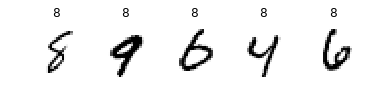

In [32]:
#5 randon result
predict = model.predict_classes(x_test)

pick = np.random.randint(1,9999, 5)

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[pick[i]].reshape(28,28), cmap='Greys')
    plt.title(predict[pick[i]])
    plt.axis("off")